In [1]:
# import statements 

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.parser import parse
from pandas.plotting import lag_plot
from sklearn.metrics import r2_score

In [2]:
# set options

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Load Data

In [3]:
# loading Data
dfInput=pd.read_csv(os.getcwd()+'\SBI_Historical_Data.csv')

dfInput.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


#  Basic Details

In [4]:
# shape

dfInput.shape

(1385, 7)

In [5]:
# DataTypes

dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


Coclusion :- The datatypes of features "Date","Vol" and "change" need to change to float. And we need to change the column name Vol. We need tochange the format of Date ,Vol and change.

In [6]:
# changing the column name of feature 
dfInput.rename(columns={'Vol.':'Vol','Change %':'Change'},inplace=True)

# checking the column names after updating the column name
dfInput.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol', 'Change'], dtype='object')

In [7]:
# changing the column format and datatype


dfInput['Date']=dfInput['Date'].apply(lambda x :parse(x))

dfInput.head()


,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


In [8]:
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1385 non-null   datetime64[ns]
 1   Price   1385 non-null   float64       
 2   Open    1385 non-null   float64       
 3   High    1385 non-null   float64       
 4   Low     1385 non-null   float64       
 5   Vol     1385 non-null   object        
 6   Change  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [9]:
# changing the content of Vol and Change 



dfInput['Vol']=dfInput['Vol'].apply(lambda x :x.replace('M'," "))

dfInput['Change']=dfInput['Change'].apply(lambda x :x.replace('%'," "))

dfInput.head()

,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07,190.65,191.45,192.10,189.55,44.82,-0.16
1,2020-08-06,190.95,192.30,194.50,190.25,59.74,-0.26
2,2020-08-05,191.45,192.75,196.85,191.00,68.89,-0.08
3,2020-08-04,191.60,193.35,193.80,190.50,43.87,-0.34
4,2020-08-03,192.25,192.00,194.60,190.05,72.46,0.42


In [11]:
dfInput.Vol.value_counts()

9.08      4
11.93     4
35.96     3
13.86     3
17.01     3
11.57     3
16.28     3
19.85     3
11.43     3
14.89     3
12.18     3
10.05     3
16.19     3
12.35     3
22.71     3
10.55     3
14.58     3
10.54     3
15.67     3
11.56     3
13.54     3
12.30     3
20.24     3
18.66     3
12.93     3
20.21     3
21.53     3
13.10     3
22.72     2
21.96     2
25.48     2
19.43     2
16.80     2
40.10     2
17.39     2
15.15     2
21.24     2
9.23      2
17.83     2
11.60     2
13.31     2
27.73     2
21.02     2
20.05     2
17.74     2
13.85     2
30.82     2
15.37     2
16.34     2
22.92     2
15.82     2
9.56      2
20.47     2
21.75     2
11.27     2
20.78     2
16.87     2
22.62     2
21.90     2
12.87     2
16.10     2
10.40     2
14.54     2
20.65     2
11.22     2
7.26      2
12.86     2
8.97      2
16.07     2
17.64     2
11.12     2
18.25     2
31.01     2
16.14     2
9.68      2
18.01     2
14.14     2
37.58     2
18.87     2
15.73     2
13.03     2
27.25     2
20.82     2
9.48

In [15]:
dfInput.shape,dfInput.Vol.count()

((1384, 7), 1384)

In [16]:
# changing the datatype of VOL and Change



# we could find a missmatched record in Vol as '-'.
# removing the same

dfInput.drop(dfInput[dfInput['Vol']=='-'].index,inplace=True)

columns=['Vol','Change']


for col in columns:

    dfInput[col]=dfInput[col].astype('float64')



In [17]:
# rechecking the datatype
dfInput.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1384 non-null   datetime64[ns]
 1   Price   1384 non-null   float64       
 2   Open    1384 non-null   float64       
 3   High    1384 non-null   float64       
 4   Low     1384 non-null   float64       
 5   Vol     1384 non-null   float64       
 6   Change  1384 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 86.5 KB


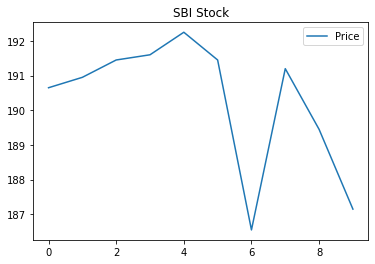

In [18]:
# ploting the trend for change

dfInput[['Price']].head(10).plot()
plt.title("SBI Stock")
plt.show()

In [22]:
dfInput.head(10)

,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07,190.65,191.45,192.10,189.55,44.82,-0.16
1,2020-08-06,190.95,192.30,194.50,190.25,59.74,-0.26
2,2020-08-05,191.45,192.75,196.85,191.00,68.89,-0.08
3,2020-08-04,191.60,193.35,193.80,190.50,43.87,-0.34
4,2020-08-03,192.25,192.00,194.60,190.05,72.46,0.42
5,2020-07-31,191.45,188.00,194.85,186.70,145.90,2.63
6,2020-07-30,186.55,192.50,193.50,186.05,48.48,-2.43
7,2020-07-29,191.20,187.60,195.25,187.00,73.77,0.92
8,2020-07-28,189.45,188.00,190.50,185.75,51.49,1.23
9,2020-07-27,187.15,193.00,193.20,186.50,50.71,-2.50


In [21]:
dfInput.head(10).cumsum()

,Date,Price,Open,High,Low,Vol,Change
0,2020-08-07 00:00:00.000000000,190.65,191.45,192.10,189.55,44.82,-0.16
1,2071-03-13 00:00:00.000000000,381.60,383.75,386.60,379.80,104.56,-0.42
2,2121-10-16 00:00:00.000000000,573.05,576.50,583.45,570.80,173.45,-0.50
3,2172-05-19 00:00:00.000000000,764.65,769.85,777.25,761.30,217.32,-0.84
4,2222-12-21 00:00:00.000000000,956.90,961.85,971.85,951.35,289.78,-0.42
5,1688-12-29 00:25:26.290448384,1148.35,1149.85,1166.70,1138.05,435.68,2.21
6,1739-07-29 00:25:26.290448384,1334.90,1342.35,1360.20,1324.10,484.16,-0.22
7,1790-02-23 00:25:26.290448384,1526.10,1529.95,1555.45,1511.10,557.93,0.70
8,1840-09-20 00:25:26.290448384,1715.55,1717.95,1745.95,1696.85,609.42,1.93
9,1891-04-16 00:25:26.290448384,1902.70,1910.95,1939.15,1883.35,660.13,-0.57


Text(0.5, 1.0, 'SBI Cumulative Returns')

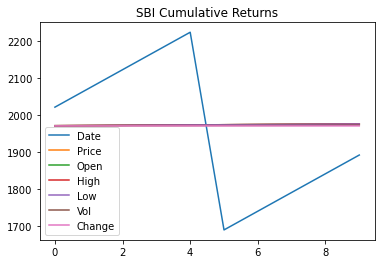

In [23]:
# Comulative Return

dfInput.head(10).cumsum().plot()
plt.title('SBI Cumulative Returns')

Text(0.5, 1.0, 'SBI Autocorrelation plot')

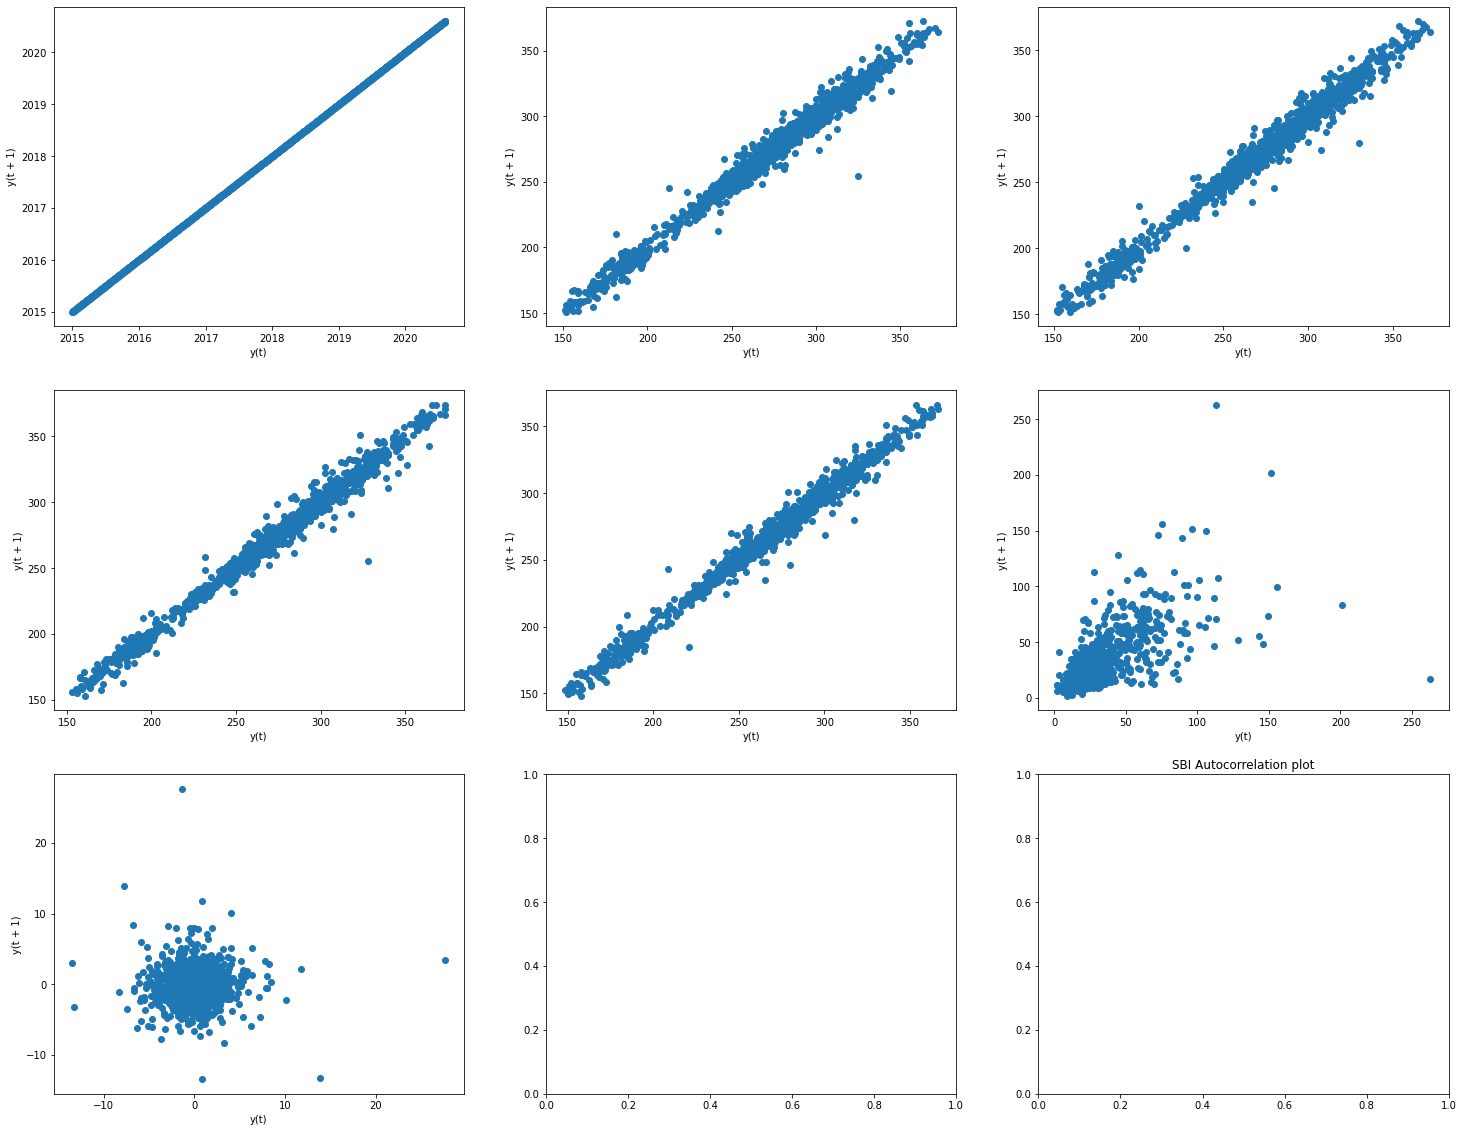

In [24]:



fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))


for variable, subplot in zip(dfInput, ax.flatten()):
    
    
    lag_plot(dfInput[variable], ax = subplot)


plt.title('SBI Autocorrelation plot')

#  Summary Statistics

In [25]:
# checking the shape
dfInput.shape

(1384, 7)

In [26]:
# checking the statistics
dfInput.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1384.0,266.263186,45.569830,150.85,245.5875,270.750,296.1750,372.40
Open,1384.0,266.892449,45.605383,151.95,245.8875,271.100,296.5250,371.95
High,1384.0,270.335405,45.845276,153.20,248.7750,274.550,300.7500,373.80
Low,1384.0,262.744147,45.261792,148.25,242.5125,267.375,292.2625,366.20
Vol,1384.0,25.295275,21.576224,2.06,13.0125,18.245,28.1175,262.68
Change,1384.0,-0.008721,2.338089,-13.46,-1.2325,-0.020,1.1700,27.69


In [28]:
# checking null values

nullValueCount=dfInput.isnull().sum().sort_values(ascending=False)

nullValuePercentage=dfInput.isnull().sum()*100/dfInput.isnull().count().sort_values(ascending=False)

dfMissingValues=pd.concat([nullValueCount,nullValuePercentage],axis=1,keys=['Count','Percentage'])

dfMissingValues

,Count,Percentage
Date,0,0.0
Price,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Vol,0,0.0
Change,0,0.0


In [30]:
# getting the age limit or Time Stamp of the data

print('Time Stamp of the data :',dfInput['Date'].min(),dfInput['Date'].max())

Time Stamp of the data : 2015-01-01 00:00:00 2020-08-07 00:00:00


In [31]:
# dropping all other columns other than 'Date' and 'Price'
dfInput.drop(dfInput.iloc[:,2:],axis=1,inplace=True)

In [32]:
dfInput.isnull().sum()

Date     0
Price    0
dtype: int64

In [33]:
len(dfInput['Date'].unique())

1384

In [35]:
# year wise and month wise sum of price


MonthlySales=dfInput.groupby('Date')['Price'].mean().reset_index()
MonthlySales

,Date,Price
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15
5,2015-01-08,304.85
6,2015-01-09,303.20
7,2015-01-12,307.10
8,2015-01-13,305.10
9,2015-01-14,304.70


In [36]:
MonthlySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1384 non-null   datetime64[ns]
 1   Price   1384 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.8 KB


In [23]:
MonthlySales.index

RangeIndex(start=0, stop=1384, step=1)

In [37]:
MonthlySales.set_index('Date', inplace=True)
MonthlySales.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1384, freq=None)

# Data visualization

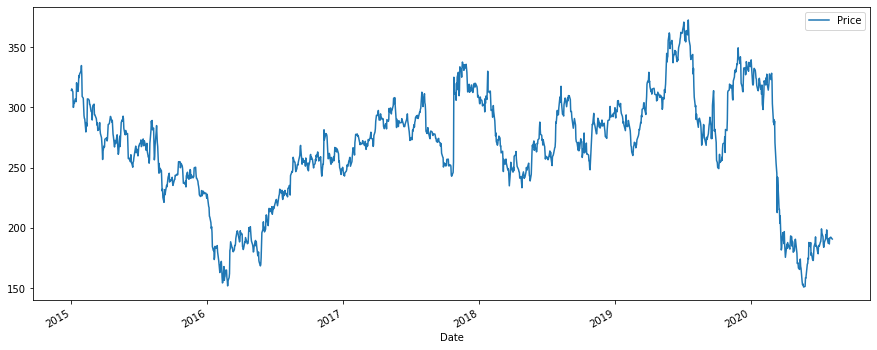

In [38]:
MonthlySales.plot(figsize=(15, 6))
plt.show()

# Sampling

In [26]:
y = MonthlySales['Price'].resample('MS').mean()
y

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
2015-06-01    260.229545
2015-07-01    266.926087
2015-08-01    268.185714
2015-09-01    234.717500
2015-10-01    245.530000
2015-11-01    242.628947
2015-12-01    232.109091
2016-01-01    195.842500
2016-02-01    161.923810
2016-03-01    186.602500
2016-04-01    190.850000
2016-05-01    182.988636
2016-06-01    210.304545
2016-07-01    226.597500
2016-08-01    242.052273
2016-09-01    255.657500
2016-10-01    257.268421
2016-11-01    261.307143
2016-12-01    256.340909
2017-01-01    252.897619
2017-02-01    272.478947
2017-03-01    275.254545
2017-04-01    288.886111
2017-05-01    295.136364
2017-06-01    285.483333
2017-07-01    289.345238
2017-08-01    288.376190
2017-09-01    268.014286
2017-10-01    267.302500
2017-11-01    327.336364
2017-12-01    315.342500
2018-01-01    307.663636
2018-02-01    282.592105
2018-03-01    251.665789
2018-04-01    248.67

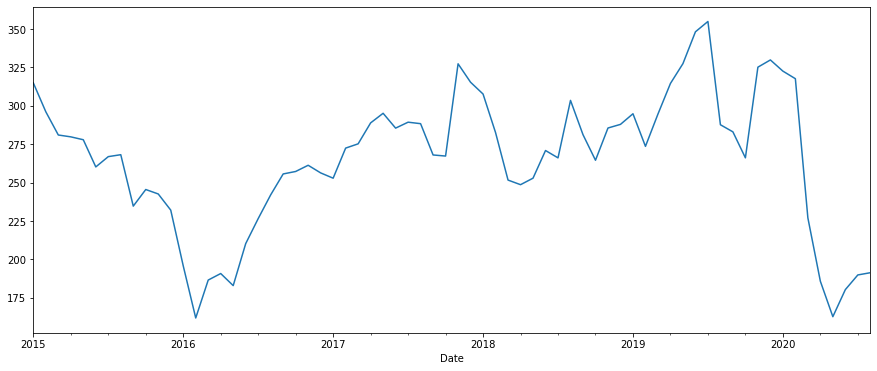

In [27]:
y.plot(figsize=(15, 6))
plt.show()

In [28]:
y

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
2015-06-01    260.229545
2015-07-01    266.926087
2015-08-01    268.185714
2015-09-01    234.717500
2015-10-01    245.530000
2015-11-01    242.628947
2015-12-01    232.109091
2016-01-01    195.842500
2016-02-01    161.923810
2016-03-01    186.602500
2016-04-01    190.850000
2016-05-01    182.988636
2016-06-01    210.304545
2016-07-01    226.597500
2016-08-01    242.052273
2016-09-01    255.657500
2016-10-01    257.268421
2016-11-01    261.307143
2016-12-01    256.340909
2017-01-01    252.897619
2017-02-01    272.478947
2017-03-01    275.254545
2017-04-01    288.886111
2017-05-01    295.136364
2017-06-01    285.483333
2017-07-01    289.345238
2017-08-01    288.376190
2017-09-01    268.014286
2017-10-01    267.302500
2017-11-01    327.336364
2017-12-01    315.342500
2018-01-01    307.663636
2018-02-01    282.592105
2018-03-01    251.665789
2018-04-01    248.67

### Decomposition

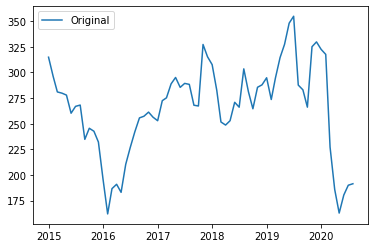

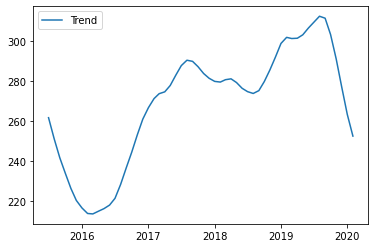

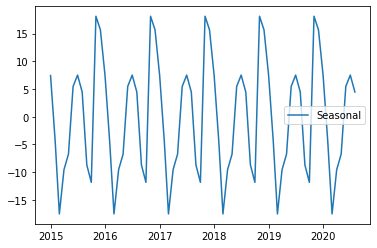

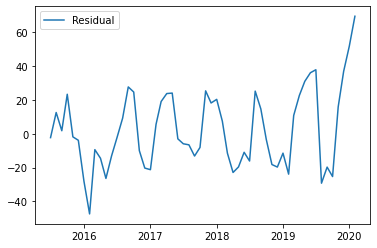

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')


seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')


residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

The plot clearly indicates that the time series has seasonality pattern.The price are always low at the middle of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

# Checking Stationarity

# 1.  ADF Test

**Null Hypothesis: The series has a unit root (value of a =1)(not stationary)**

**Alternate Hypothesis: The series has no unit root (stationary)**

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
result=adfuller(y)

print('The p-value : ',result[1])

The p-value :  0.1255272747594134


**The p-value from the ADF test is less than 0.05 . So we can conclude that we reject the null hypothesis and we say that the given data is in stationary.**

 # 2.  KPSS Test

**Null Hypothesis: The series has no  unit root ( stationary)**

**Alternate Hypothesis: The series has no unit root (not stationary)**

In [32]:
from statsmodels.tsa.stattools import kpss

In [33]:
result=kpss(y)

print('The p-value : ',result[1])

The p-value :  0.1


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


**The p-value from the KPSS test is greater than the threshold 0.05.So we can conclude that we accept the null hypothesis and we can say that the given timeseries is in stationary.**

# 1.  Log Transformation


In [34]:
# if the data is not stationary we can make use of two methods to make it stationary
# 1.  log transformation 
# 2. differencing


# code

'''
data = clean_df['Sales_quantity']
result = adfuller(np.log(data)) # code for  log transformation
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

'''

"\ndata = clean_df['Sales_quantity']\nresult = adfuller(np.log(data)) # code for  log transformation\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n\n"

In [35]:
y

Date
2015-01-01    314.902381
2015-02-01    296.115000
2015-03-01    281.002381
2015-04-01    279.800000
2015-05-01    277.922500
2015-06-01    260.229545
2015-07-01    266.926087
2015-08-01    268.185714
2015-09-01    234.717500
2015-10-01    245.530000
2015-11-01    242.628947
2015-12-01    232.109091
2016-01-01    195.842500
2016-02-01    161.923810
2016-03-01    186.602500
2016-04-01    190.850000
2016-05-01    182.988636
2016-06-01    210.304545
2016-07-01    226.597500
2016-08-01    242.052273
2016-09-01    255.657500
2016-10-01    257.268421
2016-11-01    261.307143
2016-12-01    256.340909
2017-01-01    252.897619
2017-02-01    272.478947
2017-03-01    275.254545
2017-04-01    288.886111
2017-05-01    295.136364
2017-06-01    285.483333
2017-07-01    289.345238
2017-08-01    288.376190
2017-09-01    268.014286
2017-10-01    267.302500
2017-11-01    327.336364
2017-12-01    315.342500
2018-01-01    307.663636
2018-02-01    282.592105
2018-03-01    251.665789
2018-04-01    248.67

# 2.  Differencing

In [36]:
'''

data = clean_df['Sales_quantity'].diff()[1:] # differencing code
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

'''

"\n\ndata = clean_df['Sales_quantity'].diff()[1:] # differencing code\nresult = adfuller(data)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))\n\n"

In [37]:
y=y.diff()[1:]
y

Date
2015-02-01   -18.787381
2015-03-01   -15.112619
2015-04-01    -1.202381
2015-05-01    -1.877500
2015-06-01   -17.692955
2015-07-01     6.696542
2015-08-01     1.259627
2015-09-01   -33.468214
2015-10-01    10.812500
2015-11-01    -2.901053
2015-12-01   -10.519856
2016-01-01   -36.266591
2016-02-01   -33.918690
2016-03-01    24.678690
2016-04-01     4.247500
2016-05-01    -7.861364
2016-06-01    27.315909
2016-07-01    16.292955
2016-08-01    15.454773
2016-09-01    13.605227
2016-10-01     1.610921
2016-11-01     4.038722
2016-12-01    -4.966234
2017-01-01    -3.443290
2017-02-01    19.581328
2017-03-01     2.775598
2017-04-01    13.631566
2017-05-01     6.250253
2017-06-01    -9.653030
2017-07-01     3.861905
2017-08-01    -0.969048
2017-09-01   -20.361905
2017-10-01    -0.711786
2017-11-01    60.033864
2017-12-01   -11.993864
2018-01-01    -7.678864
2018-02-01   -25.071531
2018-03-01   -30.926316
2018-04-01    -2.994361
2018-05-01     4.237662
2018-06-01    17.995671
2018-07-01 

# Time Series Forcasting using ARIMA

In [38]:
import itertools

p = d = q = [0,1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Parameter Selection

In [39]:
#We use “grid search” to find the optimal set of parameters that yields the best performance for our model
result_dict = {}
from pylab import rcParams
import statsmodels.api as sm
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False, 
                            enforce_invertibility=False)
            results = mod.fit()

            print(results)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            result_dict[round(results.aic,0)] = str(param)+str(param_seasonal)
        
            
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:607.620918449647
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:503.2502110125902
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:537.4199748770286
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:401.36889270638227
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:512.7720219680459
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:503.2347834497039
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:405.4205295794527
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:394.6597438671898
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:599.769572350046
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:494.98236132403355
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.0707319911975
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:395.34204879777536
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:514.130783908912
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:495.80422410973273
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:407.4175930767509
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:388.26797781549664
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:634.497346261144
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:522.8221728361272
ARIMA(0, 

ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:392.50815063350973
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:499.66361063640636
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:492.8572230847679
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:394.2294658088063
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:385.9334005950701


In [40]:
# getting the result with sorted order
index=sorted(result_dict.keys())
print(index)

[384.0, 386.0, 388.0, 390.0, 392.0, 393.0, 394.0, 395.0, 397.0, 399.0, 401.0, 402.0, 403.0, 405.0, 407.0, 408.0, 413.0, 416.0, 425.0, 491.0, 493.0, 495.0, 496.0, 497.0, 498.0, 500.0, 503.0, 504.0, 505.0, 511.0, 513.0, 514.0, 516.0, 523.0, 524.0, 528.0, 530.0, 535.0, 537.0, 538.0, 543.0, 554.0, 596.0, 597.0, 600.0, 602.0, 608.0, 624.0, 634.0]


In [41]:
# getting the optimal parameter

# We are selecting those parameter which has minimum AIC score

print(result_dict[index[0]])

(0, 1, 1)(1, 1, 1, 12)


# Fitting the ARIMA model

In [42]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:996: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9006      0.100     -8.971      0.000      -1.097      -0.704
ar.S.L12      -0.6077      0.178     -3.423      0.001      -0.956      -0.260
ma.S.L12      -0.2432      0.347     -0.701      0.483      -0.923       0.437
sigma2       594.3703    110.862      5.361      0.000     377.085     811.656


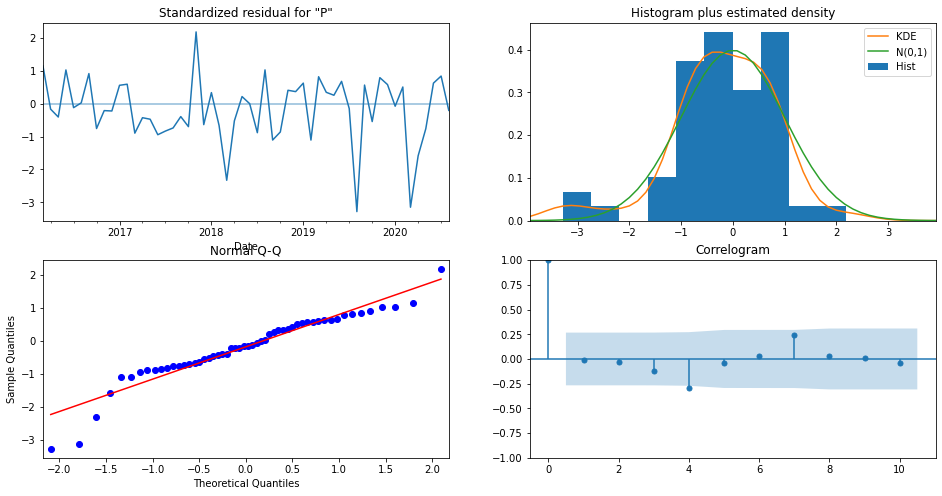

In [43]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating Forecasts

In [44]:
# We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

y.tail()

Date
2020-04-01   -41.264286
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

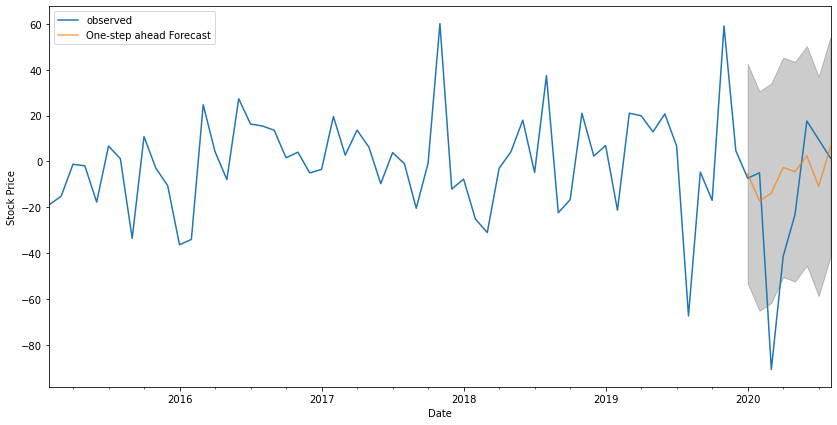

In [45]:
#set forecasts to start at 2020–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

#  Calculating MSE and RMSE

In [46]:
y['2020-01-01':]

Date
2020-01-01    -7.269772
2020-02-01    -4.932609
2020-03-01   -90.552381
2020-04-01   -41.264286
2020-05-01   -23.078070
2020-06-01    17.622010
2020-07-01     9.550988
2020-08-01     1.451739
Freq: MS, Name: Price, dtype: float64

In [47]:
pred.predicted_mean

Date
2020-01-01    -5.335834
2020-02-01   -17.236175
2020-03-01   -13.753616
2020-04-01    -2.560029
2020-05-01    -4.456627
2020-06-01     2.456344
2020-07-01   -10.860591
2020-08-01     6.473593
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
pred.conf_int()

,lower Price,upper Price
Date,,
2020-01-01,-53.132190,42.460523
2020-02-01,-65.032531,30.560182
2020-03-01,-61.547540,34.040307
2020-04-01,-50.351980,45.231923
2020-05-01,-52.246981,43.333727
2020-06-01,-45.332715,50.245403
2020-07-01,-58.648600,36.927418
2020-08-01,-41.313564,54.260751


In [49]:
from sklearn.metrics import mean_squared_error
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = mean_squared_error(pred.predicted_mean,y['2020-01-01':])
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

print('The R2 Score  our forecasts is {}'.format(round(r2_score(y_forecasted,y_truth), 10)))

The Mean Squared Error of our forecasts is 1071.22
The Root Mean Squared Error of our forecasts is 32.73
The R2 Score  our forecasts is -18.0092340992


In [50]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


print('The R2 Score  our forecasts is {}'.format(round(r2_score(y_forecasted,y_truth), 10)))

The Mean Squared Error of our forecasts is 1071.22
The Root Mean Squared Error of our forecasts is 32.73
The R2 Score  our forecasts is -18.0092340992


# Visualizing the Forecast

            lower Price  upper Price
2020-09-01   -74.405985    21.166950
2020-10-01   -69.774393    26.269655
2020-11-01   -24.959426    71.553436
2020-12-01   -57.022632    39.956778
2021-01-01   -55.632611    41.811113
2021-02-01   -75.458052    22.448660
2021-03-01   -62.235346    36.131300
2021-04-01   -51.198043    47.626396
2021-05-01   -52.506170    46.773952
2021-06-01   -39.784573    59.949149
2021-07-01   -53.314739    46.870531
2021-08-01   -95.966795     4.667995
2021-09-01   -71.423270    31.977290
2021-10-01   -77.263220    26.712104
2021-11-01   -13.747231    90.799697
2021-12-01   -59.514468    45.600955
2022-01-01   -66.438338    39.242523
2022-02-01   -72.985323    33.258410
2022-03-01  -120.022601   -13.219407
2022-04-01   -85.927274    21.432467
2022-05-01   -75.575387    32.338030
2022-06-01   -46.036626    62.427640
2022-07-01   -56.434526    52.577806
2022-08-01   -78.271980    31.285677
2022-09-01   -96.655980    35.889486
2022-10-01   -96.434795    37.228107
2

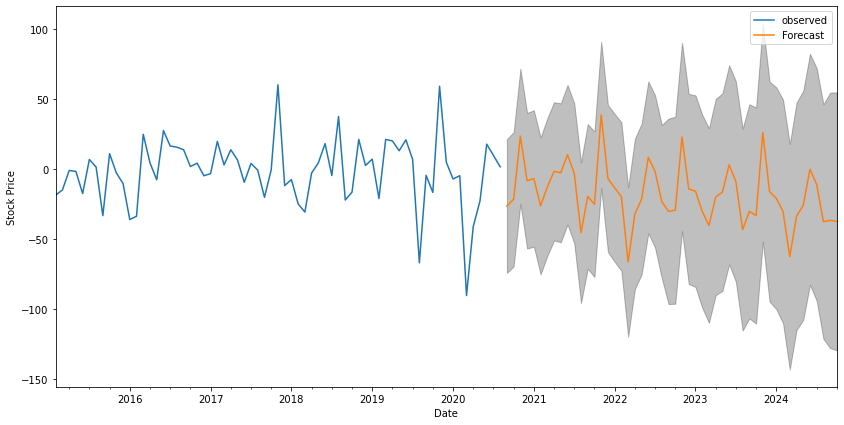

In [51]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
print(pred_ci)
plt.legend()
plt.show()

In [52]:
values = pd.DataFrame(y.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe

,0,0
0,NaN,-18.787381
1,-18.787381,-15.112619
2,-15.112619,-1.202381
3,-1.202381,-1.877500
4,-1.877500,-17.692955
5,-17.692955,6.696542
6,6.696542,1.259627
7,1.259627,-33.468214
8,-33.468214,10.812500
9,10.812500,-2.901053


Test RMSE: 45.465


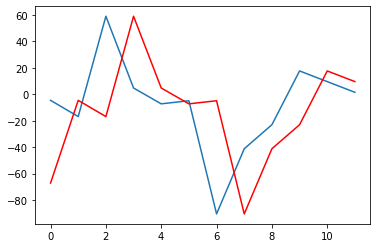

In [53]:
series = pd.Series(y)

# create lagged dataset
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-12], X[len(X)-12:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')